In [47]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import os
import graphviz 
os.environ["PATH"] += os.pathsep + r"C:/Program Files (x86)/Graphviz2.38/bin"
from sklearn.preprocessing import LabelEncoder


In [48]:
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

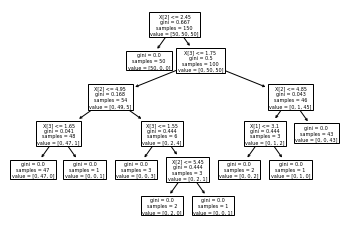

In [49]:
tree.plot_tree(clf.fit(X, y)) 

In [50]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X") 

'X.pdf'

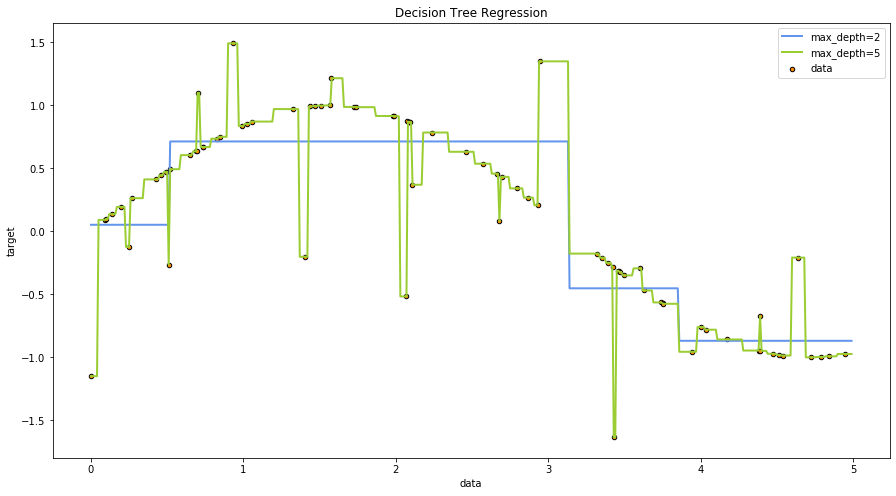

In [36]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,8))

plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [57]:
SimpleTree = pd.read_csv('TreeExample.csv')

In [58]:
SimpleTree

,Outlook,Temperature,Windy,Play
0,Overcast,Cool,True,Yes
1,Overcast,Hot,True,Yes
2,Overcast,Mild,True,Yes
3,Overcast,Cool,False,No
4,Overcast,Hot,False,Yes
5,Overcast,Mild,False,No
6,Rainy,Cool,True,No
7,Rainy,Mild,True,No
8,Rainy,Cool,False,No
9,Rainy,Mild,False,No


In [59]:
Outlook_Enc = LabelEncoder()
Temperature_Enc = LabelEncoder()
Windy_Enc = LabelEncoder()
Play_Enc = LabelEncoder()

In [60]:
SimpleTree['Outlook_Enc'] = Outlook_Enc.fit_transform(SimpleTree['Outlook'])
SimpleTree['Temperature_Enc'] = Temperature_Enc.fit_transform(SimpleTree['Temperature'])
SimpleTree['Windy_Enc'] = Windy_Enc.fit_transform(SimpleTree['Windy'])
SimpleTree['Play_Enc'] = Play_Enc.fit_transform(SimpleTree['Play'])

In [61]:
SimpleTree

,Outlook,Temperature,Windy,Play,Outlook_Enc,Temperature_Enc,Windy_Enc,Play_Enc
0,Overcast,Cool,True,Yes,0,0,1,1
1,Overcast,Hot,True,Yes,0,1,1,1
2,Overcast,Mild,True,Yes,0,2,1,1
3,Overcast,Cool,False,No,0,0,0,0
4,Overcast,Hot,False,Yes,0,1,0,1
5,Overcast,Mild,False,No,0,2,0,0
6,Rainy,Cool,True,No,1,0,1,0
7,Rainy,Mild,True,No,1,2,1,0
8,Rainy,Cool,False,No,1,0,0,0
9,Rainy,Mild,False,No,1,2,0,0


In [67]:
x = SimpleTree[['Outlook_Enc', 'Temperature_Enc', 'Windy_Enc']]
y = SimpleTree['Play_Enc']

In [68]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [71]:
classes = SimpleTree['Play'].unique()
classes

array(['Yes', 'No'], dtype=object)

In [44]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X") 

'X.pdf'

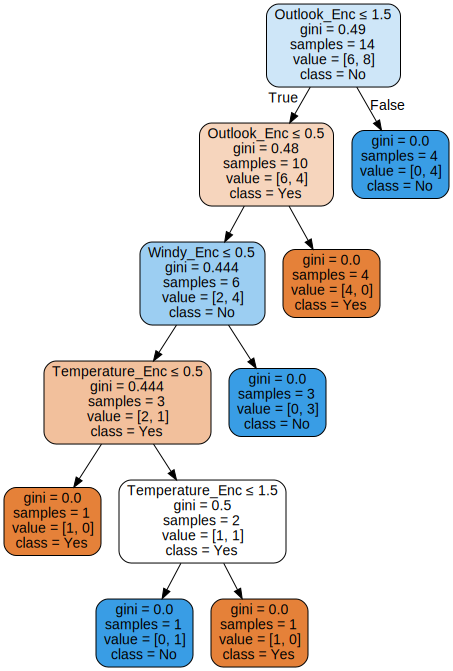

In [72]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=x.columns,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 